In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
import seaborn as sns
import stackprinter
import pygal
import pygal_maps_world.maps
from pygal_maps_world.i18n import COUNTRIES
import cairosvg
stackprinter.set_excepthook(style='darkbg2')

In [3]:
data =pd.read_csv('/Users/tommy84729/Coding/DL/ＨＷ2/covid_19.csv') 
data = data.iloc[2:,:]

In [4]:
data.index = data.iloc[:,0]
data = data.iloc[:,3:]
data = data.astype(float)

In [5]:
data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,281.0,299.0,349.0,367.0,423.0,444.0,484.0,521.0,555.0,607.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,304.0,333.0,361.0,377.0,383.0,400.0,409.0,416.0,433.0,446.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1171.0,1251.0,1320.0,1423.0,1468.0,1572.0,1666.0,1761.0,1825.0,1914.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,439.0,466.0,501.0,525.0,545.0,564.0,583.0,601.0,601.0,638.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,10.0,14.0,16.0,17.0,19.0,19.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,194.0,217.0,237.0,254.0,261.0,263.0,263.0,267.0,268.0,290.0
Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [6]:
corr = data.T.corr()

In [7]:
corr

Unnamed: 0,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.000000,0.968034,0.995311,0.964898,0.988053,0.984950,0.988906,0.974923,0.943478,0.935927,...,0.998769,0.941153,0.983339,0.908799,0.902626,0.977290,0.884571,0.642164,0.924399,0.967161
Albania,0.968034,1.000000,0.980922,0.995456,0.970469,0.979949,0.990110,0.996503,0.992054,0.991067,...,0.965955,0.990983,0.922758,0.980064,0.978095,0.990915,0.790210,0.512602,0.970006,0.986492
Algeria,0.995311,0.980922,1.000000,0.978469,0.988754,0.991595,0.996124,0.988345,0.962923,0.955134,...,0.994551,0.959244,0.966893,0.930649,0.925101,0.988198,0.858445,0.589970,0.945027,0.977409
Andorra,0.964898,0.995456,0.978469,1.000000,0.969435,0.975305,0.990851,0.996315,0.996310,0.993881,...,0.963319,0.994679,0.917543,0.980864,0.973327,0.981026,0.776524,0.506204,0.982827,0.993494
Angola,0.988053,0.970469,0.988754,0.969435,1.000000,0.982749,0.985191,0.974882,0.948843,0.941187,...,0.988584,0.947643,0.972229,0.917347,0.907792,0.977806,0.892938,0.578084,0.925702,0.967460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.977290,0.990915,0.988198,0.981026,0.977806,0.986636,0.988140,0.990060,0.972507,0.968105,...,0.975472,0.968631,0.940049,0.951570,0.955219,1.000000,0.833658,0.525347,0.948135,0.972354
Western Sahara,0.884571,0.790210,0.858445,0.776524,0.892938,0.848614,0.830026,0.797398,0.728118,0.715497,...,0.887703,0.728717,0.930580,0.682200,0.670101,0.833658,1.000000,0.648420,0.694764,0.777808
Yemen,0.642164,0.512602,0.589970,0.506204,0.578084,0.564972,0.575550,0.519447,0.457477,0.457236,...,0.658489,0.481914,0.716964,0.427712,0.416168,0.525347,0.648420,1.000000,0.431140,0.560096


## correlation figure

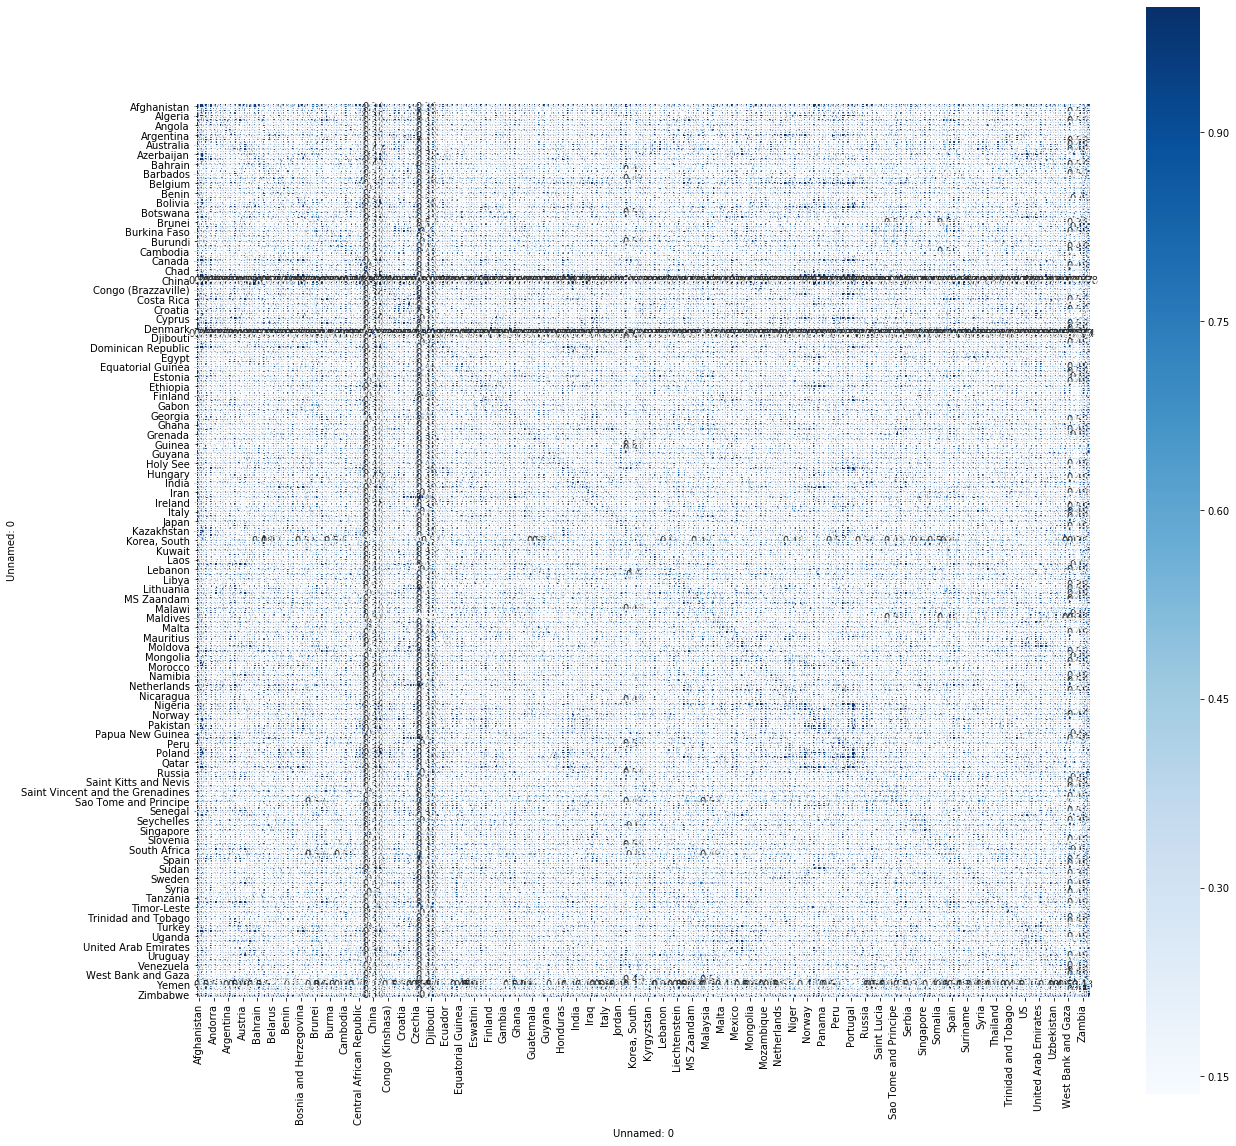

In [8]:
plt.subplots(figsize=(20, 20)) # 設定畫面大小
sns.heatmap(corr, annot=True, vmax=1, square=True, cmap="Blues")

In [ ]:
'''
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})


## choose corr > 0.95 : 182

In [17]:
country = []
for i in range(len(corr)) : 
    for j in range(len(corr)) : 
        if j != i : 
            if corr.iloc[i,j] > 0.95 : 
                if corr.index[j] not in country : 
                    country.append(corr.index[j])
                if corr.columns[i] not in country : 
                    country.append(corr.columns[i])

In [18]:
len(country)

182

## 選定區間的大小：5

In [21]:
def dataset(data, sequence) : 
    dataset = []
    label = []
    for i in range(len(data)) : 
        a = pd.DataFrame(df.iloc[i])
        for j in range(len(a)-sequence) : 
            x = a.iloc[j:j+sequence,0].values
            num = a.iloc[j+sequence,0]
            dataset.append(x)
            if x[4] < num : 
                label.append(1)
            else : 
                label.append(0)
    return(np.array(dataset), np.array(label))

In [22]:
X, Y = dataset(df,5)

In [23]:
X = np.array(X).reshape(-1,1,5)
X = X.astype(np.float32)

## train test split

In [24]:
x_train = X[:int(13706 * 0.7)]
x_test = X[int(13706 * 0.7):]
y_train = Y[:int(13706 * 0.7)]
y_test = Y[int(13706 * 0.7):]

In [25]:
x_train.shape

(9594, 1, 5)

In [26]:
batch_size = 32
feature_train = torch.from_numpy(x_train)
feature_test = torch.from_numpy(x_test)
target_train = torch.from_numpy(y_train).type(torch.LongTensor)
target_test = torch.from_numpy(y_test).type(torch.LongTensor)
train_set = torch.utils.data.TensorDataset(feature_train, target_train)
test_set = torch.utils.data.TensorDataset(feature_test, target_test)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True, drop_last = False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, shuffle = True, drop_last = False)

## Model 

In [27]:
class basemodel(nn.Module) : 
    def __init__(self, input_dim, hidden, output_dim, layer, model_type) : 
        super(basemodel, self).__init__()
        self.input_dim = input_dim
        self.hidden = hidden
        self.output_dim = output_dim
        self.layer = layer
        if model_type == 'Rnn' : 
            self.model = nn.RNN(input_size=self.input_dim, hidden_size=self.hidden,
                        num_layers=self.layer, dropout=0.0,
                         nonlinearity="tanh", batch_first = True)
        if model_type == 'Lstm' : 
            self.model = nn.LSTM(input_size=self.input_dim, hidden_size=self.hidden,
                        num_layers=self.layer, dropout=0.0,
                         batch_first=True)
        self.fc = nn.Linear(self.hidden, self.output_dim)
        print(self.model)
            

In [28]:
class rnnmodel(basemodel) : 
    def __init__(self,input_dim, hidden, output_dim, layer, model_type) : 
        super(rnnmodel, self).__init__(input_dim, hidden, output_dim, layer, model_type)
        
    def forward(self, x) : 
        h0 = Variable(torch.randn(self.layer , x.size(0), self.hidden))
        rnn_output, hn = self.model(x, h0)
        out = rnn_output[:, -1 , :]
        out = self.fc(out)
        out = F.softmax(out, dim = 1)
        hn = hn.view(x.size(0),self.hidden)
        
        return out

In [29]:
class lstm(basemodel) : 
    
    def __init__(self,input_dim, hidden, output_dim, layer, model_type) : 
        super(lstm, self).__init__(input_dim, hidden, output_dim, layer, model_type)
        
    def forward(self, x) : 
        h0 = torch.randn(self.layer , x.size(0), self.hidden)
        c0 = torch.randn(self.layer , x.size(0), self.hidden)
        rnn_output, (hn, cn) = self.model(x, (h0, c0))
        out = rnn_output[ :, -1, : ]
        out = self.fc(out)
        out = F.softmax(out, dim = 1)
        hn = hn.view(x.size(0),self.hidden)
        return out
        
    def predict(self, x):
        outputs = self(x)
        _, predicted = torch.max(outputs, 1)
        return predicted

In [30]:
def train(model,train_loader,test_loader, epoch) : 
    train_acc = []
    test_acc = []
    criterion = nn.NLLLoss()
    for i in range(epoch) : 
        correct_train = 0
        correct_test = 0
        total_train = 0
        total_test = 0
        label_train = []
        label_test = []
        print(f'epoch: {i+1}/{epoch}', end = '\r')

        for x_train ,label in (train_loader) : 

            train_pred = model(x_train)
            optimizer.zero_grad()
            loss = criterion(train_pred, label)
            # Backward pass
            loss.backward()
            optimizer.step()
            predict = torch.max(train_pred.data,1)[1]
            label_train.extend(label.cpu().numpy())
            total_train += label.size(0)
            correct_train += (predict == label).sum().item()
        train_acc.append(correct_train/total_train)
        model.eval()
        for x_test, label in (test_loader) : 
            test_pred = model(x_test)
            test_predict = torch.max(test_pred.data,1)[1]
            label_test.extend(label.cpu().numpy())
            total_test += label.size(0)
            correct_test += (test_predict == label).sum().item()
        test_acc.append(correct_test/total_test)
    
    return train_acc, test_acc

    

In [31]:
model_rnn = rnnmodel(5,32,2,1,'Rnn').float()
optimizer = torch.optim.Adam(model_rnn.parameters(), lr = 0.001)


RNN(5, 32, batch_first=True)


In [32]:
rnn_train_acc, rnn_test_acc = train(model_rnn,train_loader,test_loader,100)

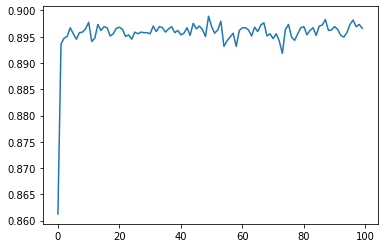

In [33]:
plt.plot(rnn_train_acc)

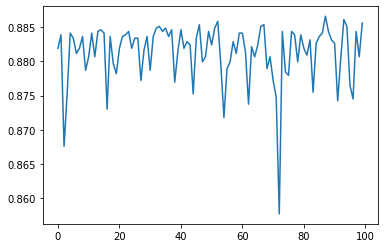

In [34]:
plt.plot(rnn_test_acc)

## change different time interval : 7

In [37]:
X_7, Y_7 = dataset(df,7)
X_7 = np.array(X_7).reshape(-1,1,7)
X_7 = X_7.astype(np.float32)

In [38]:
len(X_7)

13286

In [39]:
index = [i for i in range(len(X_7))]
np.random.shuffle(index)
x_train_7 = X_7[index[ : int(len(X_7) * 0.7)]]
x_test_7 = X_7[index[int(len(X_7) * 0.7) : ]]
y_train_7 = Y_7[  index[:int(len(X_7) * 0.7)]]
y_test_7 = Y_7 [index[int(len(X_7) * 0.7) : ]]

In [40]:
feature_train = torch.from_numpy(x_train_7)
feature_test = torch.from_numpy(x_test_7)
target_train = torch.from_numpy(y_train_7).type(torch.LongTensor)
target_test = torch.from_numpy(y_test_7).type(torch.LongTensor)

In [41]:
train_set = torch.utils.data.TensorDataset(feature_train, target_train)
test_set = torch.utils.data.TensorDataset(feature_test, target_test)

In [42]:
train_loader_7 = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = True, drop_last = False)
test_loader_7 = torch.utils.data.DataLoader(test_set, batch_size = 32, shuffle = True, drop_last = False)

In [43]:
model_lstm = lstm(7,32,2,1,'Lstm').float()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr = 0.001)

LSTM(7, 32, batch_first=True)


In [44]:
lstm_train_acc, lstm_test_acc = train(model_lstm,train_loader_7,test_loader_7,100)

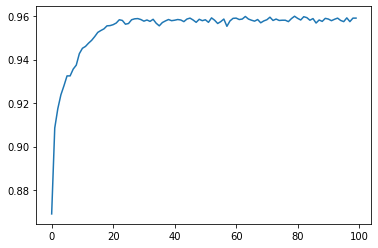

In [45]:
plt.plot(lstm_train_acc)

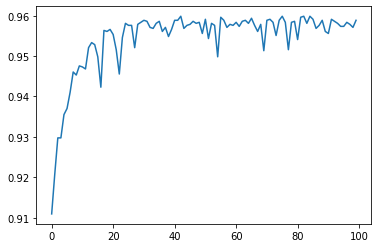

In [46]:
plt.plot(lstm_test_acc)

## predict with probability and Map

In [47]:
pred_data = df.iloc[:, -7:]
pred_data = np.array(pred_data).reshape(-1,1,7)
#pred_data = torch.from_numpy(pred_data)
#pred_data = torch.utils.data.TensorDataset(pred_data)
pred_data = Variable(torch.LongTensor(pred_data).float())
#pred_data= torch.utils.data.DataLoader(pred_data, batch_size = 1 , shuffle = False, drop_last = False)
#dataiter = iter(pred_data) 
#data = dataiter.next()

In [48]:
pred_data.shape

torch.Size([182, 1, 7])

In [50]:
model_lstm.eval()
output = model_lstm(pred_data)

In [51]:
country_set = pd.DataFrame(COUNTRIES.items())
prob = pd.DataFrame(output.detach().numpy()[:,:])
country = pd.DataFrame(df.index.values)
prob = pd.concat([country, prob], axis = 1)
prob.columns = ['country', 'desc', 'asc']
country_set.columns = ['code', 'country']
prob = pd.merge(prob, country_set, left_on = 'country', right_on = 'country', how = 'left')

In [52]:
ascending = []
descending = []
for i in range(len(prob)) : 
    if prob.iloc[i,1] > 0.5 : 
        descending.append(i)
    else : 
        ascending.append(i)

In [53]:
ascending = prob.iloc[ascending, : ]
descending = prob.iloc[descending, : ]

In [54]:
ascending

,country,desc,asc,code
0,Albania,2.537286e-04,0.999746,al
1,Afghanistan,1.474576e-11,1.000000,af
2,Algeria,1.034136e-06,0.999999,dz
3,Andorra,2.537286e-04,0.999746,ad
5,Antigua and Barbuda,4.388159e-05,0.999956,NaN
...,...,...,...,...
174,Brunei,1.129428e-02,0.988706,NaN
177,Diamond Princess,1.209874e-02,0.987901,NaN
178,China,1.209874e-02,0.987901,cn
179,Gambia,6.842805e-17,1.000000,gm


In [55]:
dict_asc = {}
keys = [i for i in ascending.iloc[:,3]]
values = [i for i in ascending.iloc[:,2]]
for i ,name in enumerate(keys):
        dict_asc[name] = values[i]

dict_desc = {}
keys = [i for i in descending.iloc[:,3]]
values = [i for i in descending.iloc[:,1]]
for i ,name in enumerate(keys):
        dict_desc[name] = values[i]

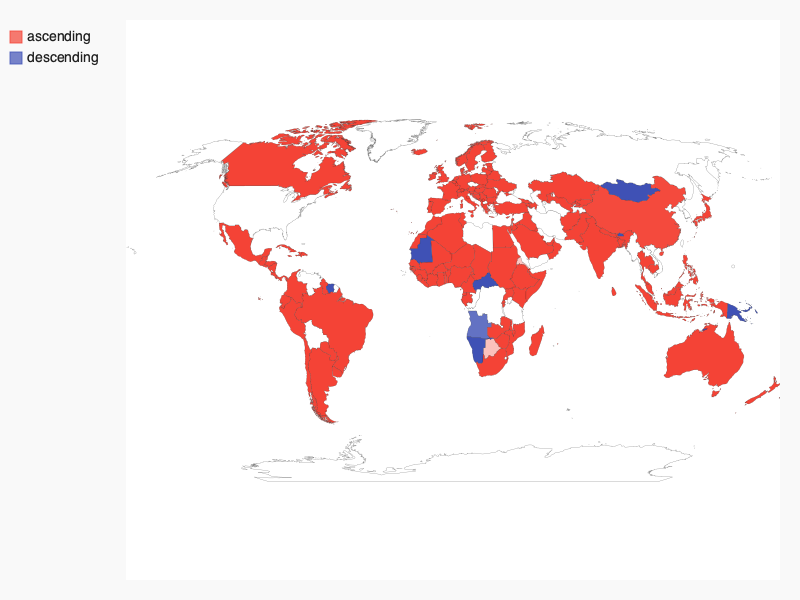

In [65]:
wm = pygal_maps_world.maps.World()
wm.add('ascending', dict_asc)
wm.add('descending', dict_desc)

In [57]:
country_set = pd.DataFrame(COUNTRIES.items())
country_set

,0,1
0,ad,Andorra
1,ae,United Arab Emirates
2,af,Afghanistan
3,al,Albania
4,am,Armenia
...,...,...
179,ye,Yemen
180,yt,Mayotte
181,za,South Africa
182,zm,Zambia
